In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel('WineData.xlsx')

In [3]:
df.head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.drop(['Unnamed: 0','OD280'], axis=1,inplace=True)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,735


In [5]:
df.isnull().sum()


Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
Proline                 0
dtype: int64

In [6]:
df.shape


(178, 12)

In [7]:
#Scale data
from sklearn.preprocessing import StandardScaler

In [8]:
scaler= StandardScaler()
scaled_data= scaler.fit_transform(df)

In [9]:
scaled_df=pd.DataFrame(scaled_data,columns=df.columns)
scaled_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,-0.037874


In [10]:
df.columns


Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'Proline'],
      dtype='object')

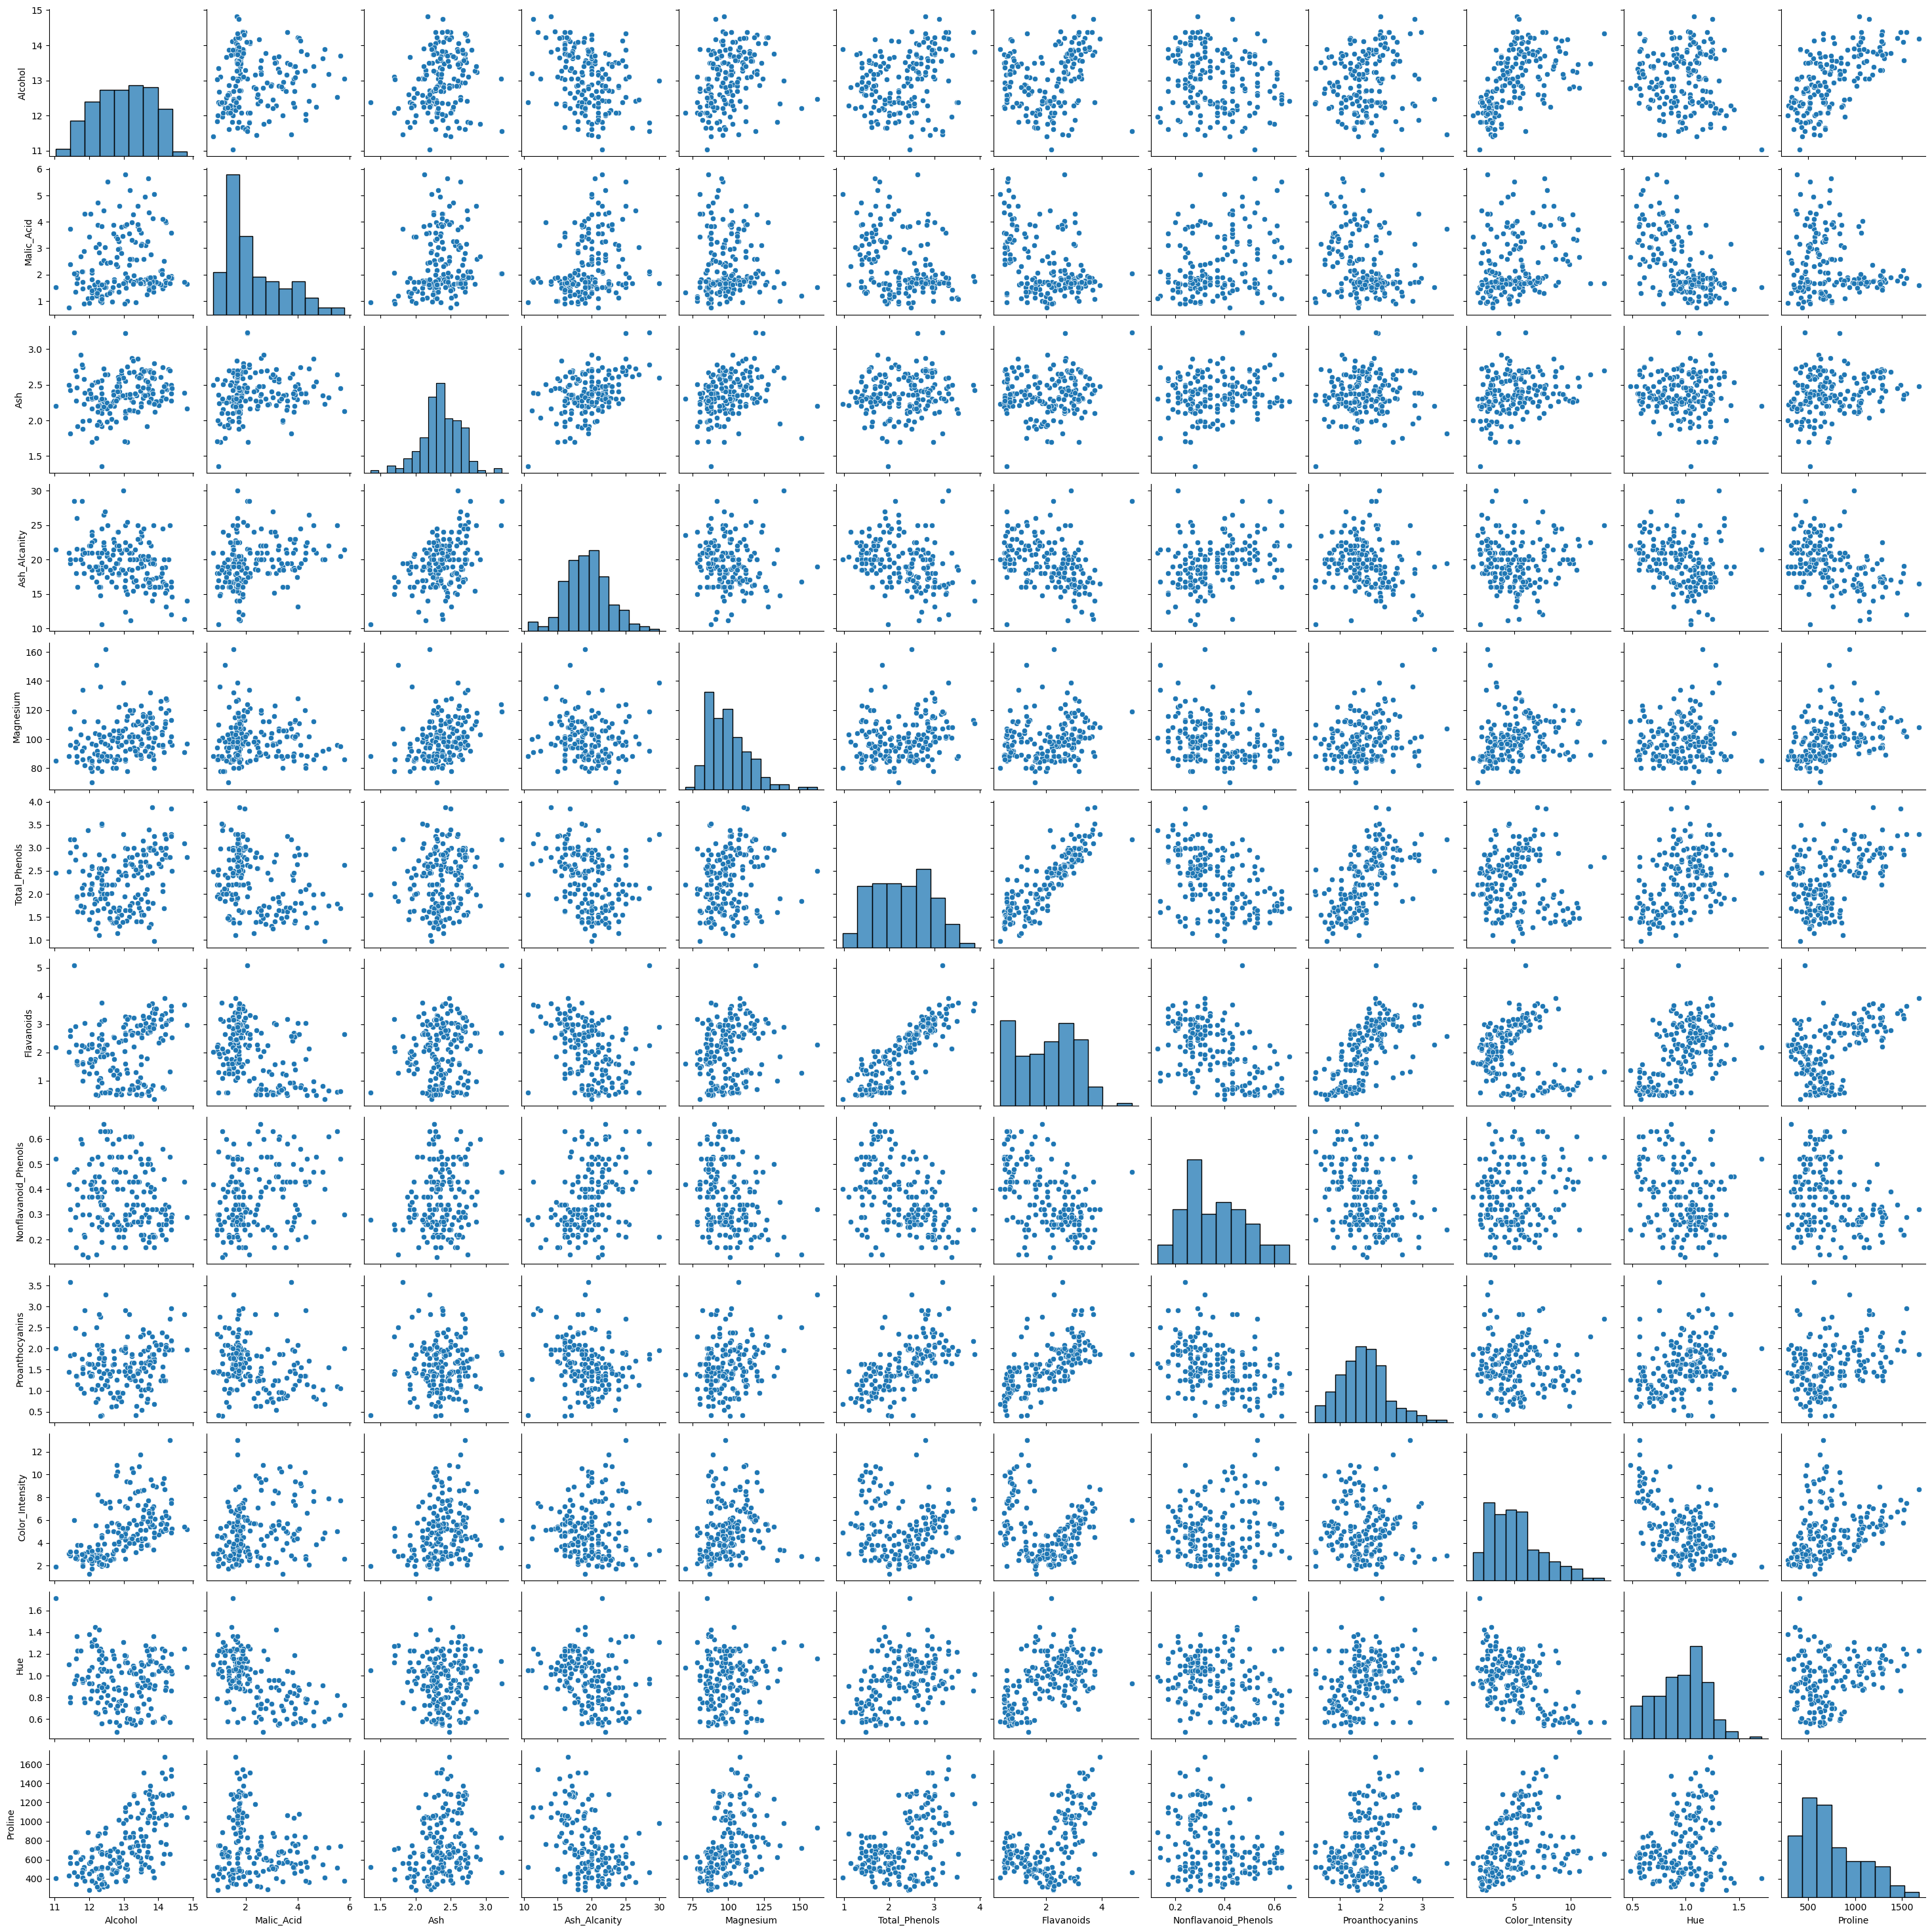

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'Proline']])
plt.savefig('image.png')

In [61]:
pip install umap-learn

   ---------------------------------------- 0.0/85.7 kB ? eta -:--:--
   -------------- ------------------------- 30.7/85.7 kB ? eta -:--:--
   -------------- ------------------------- 30.7/85.7 kB ? eta -:--:--
   ---------------------------------------- 85.7/85.7 kB 802.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/56.9 kB ? eta -:--:--
   ---------------------------------------- 56.9/56.9 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


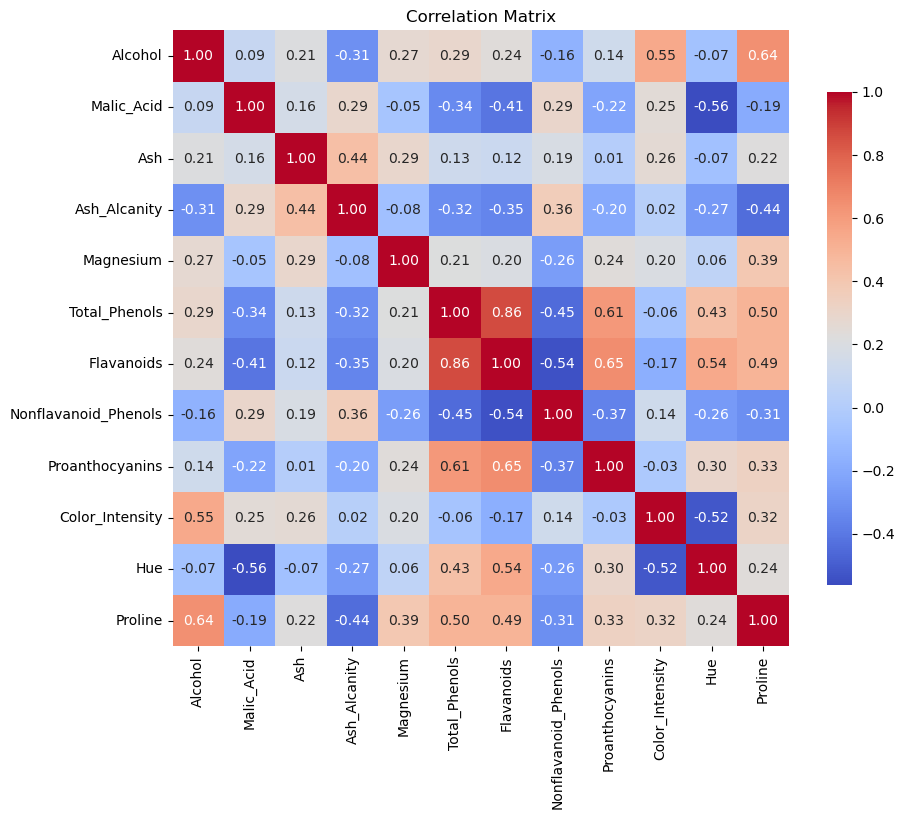

In [13]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [14]:

from sklearn.cluster import KMeans


In [15]:
wcss=[]
clusters = range(1,10)
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Alcohol', 'Color_Intensity']])
    wcss.append(kmeans.inertia_)


Text(0.5, 0, 'Number of Clusters')

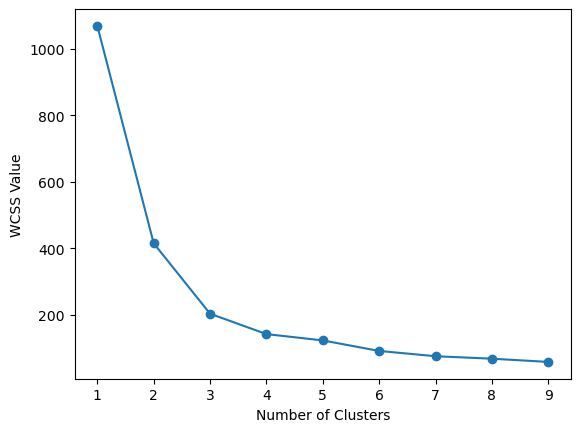

In [16]:
plt.plot(range(1,10), wcss, marker='o')
plt.ylabel('WCSS Value')
plt.xlabel('Number of Clusters')

In [80]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [17]:
from kneed import KneeLocator as kn

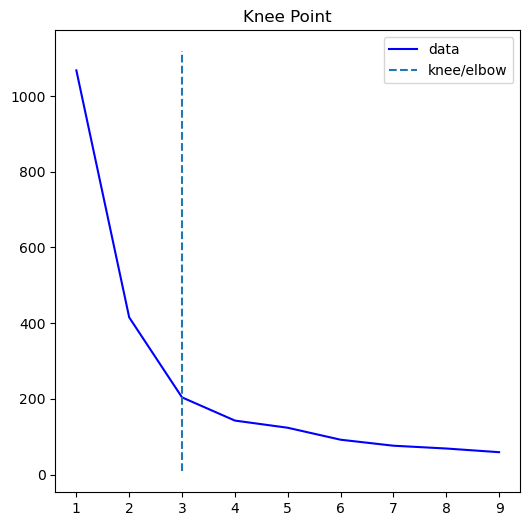

In [18]:
kl = kn(clusters, wcss, direction='decreasing', curve='convex')
kl.plot_knee()

In [21]:
wcss

[1067.9315729004504,
 415.2359949665714,
 203.8193758446264,
 142.57519793206444,
 123.6007678972276,
 92.01367517647046,
 76.15144709272974,
 68.74417840805644,
 59.03896554133216]

In [22]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline,Cluster
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,746.893258,0.971910
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,314.907474,0.853241
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,1680.000000,2.000000


In [23]:
optimal_clusters = 3  # Elbow method result
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [24]:
df['Cluster'] = kmeans.labels_

# Display the DataFrame with cluster labels
print(df)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

In [39]:
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['Magnesium', 'Malic_Acid']])
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,735,1


In [40]:
centroids = kmeans.cluster_centers_
centroids

array([[ 87.32432432,   2.34364865],
       [125.11538462,   2.06653846],
       [103.06410256,   2.41935897]])

In [41]:
df0 = df[df.Cluster==0]
df1 = df[df.Cluster==1] 
df2 = df[df.Cluster==2]  

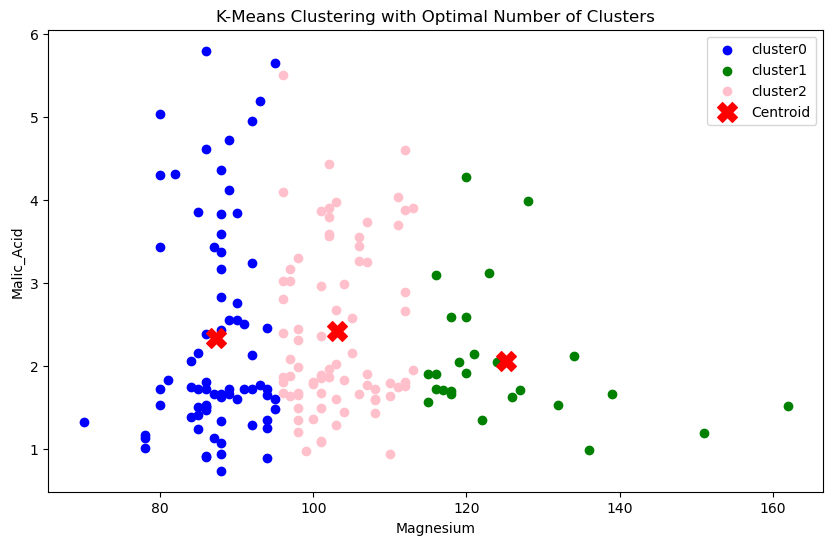

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df0.Magnesium, df0.Malic_Acid, color='blue', marker='o', label='cluster0')
plt.scatter(df1.Magnesium, df1.Malic_Acid, color='green', marker='o', label='cluster1') 
plt.scatter(df2.Magnesium, df2.Malic_Acid, color='pink', marker='o', label='cluster2')  

plt.scatter(centroids[:,0], centroids[:,1], marker='X', color='red', label='Centroid', s=200)

plt.xlabel('Magnesium')
plt.ylabel('Malic_Acid')
plt.title('K-Means Clustering with Optimal Number of Clusters')
plt.legend()
plt.show()

In [44]:
cluster_means = df.groupby('Cluster').mean()

In [45]:
cluster_means

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline
Cluster,,,,,,,,,,,,
0,12.717162,2.343649,2.260270,19.864865,87.324324,2.130270,1.812838,0.389865,1.524054,4.409054,0.951892,598.554054
1,13.327692,2.066538,2.511923,19.526923,125.115385,2.531538,2.463462,0.306538,1.875769,5.521154,0.977692,884.038462
2,13.160513,2.419359,2.418846,19.133333,103.064103,2.372692,2.089872,0.353718,1.559359,5.519487,0.955974,841.910256


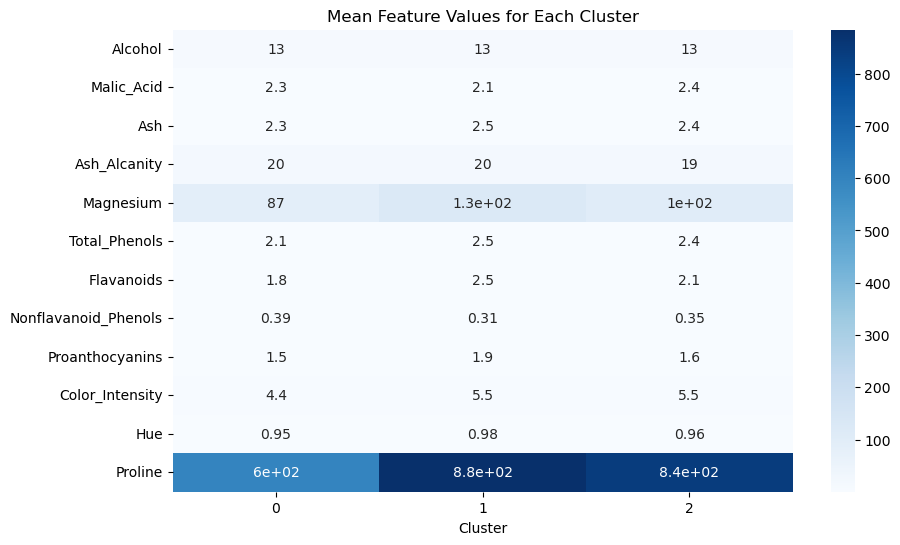

In [47]:
plt.figure(figsize=(10, 6))

sns.heatmap(cluster_means.T, annot=True, cmap='Blues')
plt.title('Mean Feature Values for Each Cluster')
plt.show()

In [48]:
feature_columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 
                    'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 
                    'Proanthocyanins', 'Color_Intensity', 'Hue', 'Proline']


for column in feature_columns:
    highest_value = df[column].max()
    row_with_max = df[df[column] == highest_value]
    highest_cluster = row_with_max['Cluster'].values[0]
    
   
    lowest_value = df[column].min()
    row_with_min = df[df[column] == lowest_value]
    lowest_cluster = row_with_min['Cluster'].values[0]
    
   
    print(f"Column: {column}")
    print(f"  - Highest value: {highest_value} and Cluster {highest_cluster}")
    print(f"  - Lowest value: {lowest_value} and Cluster {lowest_cluster}")
    print("------------------------------------------------------------")

Column: Alcohol
  - Highest value: 14.83 and Cluster 2
  - Lowest value: 11.03 and Cluster 0
------------------------------------------------------------
Column: Malic_Acid
  - Highest value: 5.8 and Cluster 0
  - Lowest value: 0.74 and Cluster 0
------------------------------------------------------------
Column: Ash
  - Highest value: 3.23 and Cluster 1
  - Lowest value: 1.36 and Cluster 0
------------------------------------------------------------
Column: Ash_Alcanity
  - Highest value: 30.0 and Cluster 1
  - Lowest value: 10.6 and Cluster 0
------------------------------------------------------------
Column: Magnesium
  - Highest value: 162 and Cluster 1
  - Lowest value: 70 and Cluster 0
------------------------------------------------------------
Column: Total_Phenols
  - Highest value: 3.88 and Cluster 2
  - Lowest value: 0.98 and Cluster 0
------------------------------------------------------------
Column: Flavanoids
  - Highest value: 5.08 and Cluster 1
  - Lowest value: 0.3

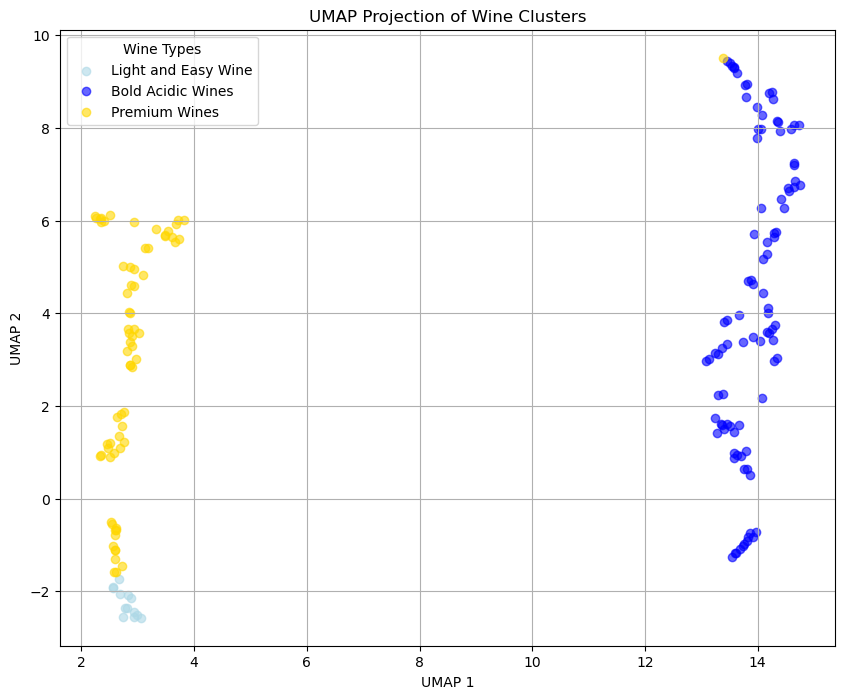

In [61]:
#annotation
import umap
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['Magnesium', 'Malic_Acid']])

# Define the mapping for clusters
cluster_labels = {
    0: 'Light and Easy Wine',
    1: 'Bold Acidic Wines',
    2: 'Premium Wines'
}

# Map the cluster labels to a new column
df['Cluster_Description'] = df['Cluster'].map(cluster_labels)

# Prepare data for UMAP
features = df[['Magnesium', 'Malic_Acid']]  # Adjust features as needed
umap_model = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')
umap_embeddings = umap_model.fit_transform(features)

# Add UMAP results to the DataFrame
df['UMAP_1'] = umap_embeddings[:, 0]
df['UMAP_2'] = umap_embeddings[:, 1]

# Define color mapping
color_map = {
    'Light and Easy Wine': 'lightblue',
    'Bold Acidic Wines': 'blue',
    'Premium Wines': 'gold'
}

# Plotting UMAP results with proper colors
plt.figure(figsize=(10, 8))
for label, color in color_map.items():
    subset = df[df['Cluster_Description'] == label]
    plt.scatter(subset['UMAP_1'], subset['UMAP_2'], label=label, color=color, alpha=0.6)

# Customize the plot
plt.title('UMAP Projection of Wine Clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Wine Types')
plt.grid()
plt.show()

In [58]:
features

,Magnesium,Malic_Acid
0,127,1.71
1,100,1.78
2,101,2.36
3,113,1.95
4,118,2.59
...,...,...
173,95,5.65
174,102,3.91
175,120,4.28
176,120,2.59


In [59]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline,Cluster,Cluster_Description,UMAP_1,UMAP_2
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,1065,1,Bold Acidic Wines,-2.756882,2.035604
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,1050,2,Premium Wines,4.459673,10.274524
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,1185,2,Premium Wines,4.148469,10.455367
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,1480,1,Bold Acidic Wines,-0.900707,5.639106
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,735,1,Bold Acidic Wines,-1.948073,2.947195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,740,2,Premium Wines,9.546949,5.918493
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,750,2,Premium Wines,3.481641,11.259941
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,835,1,Bold Acidic Wines,-2.238732,2.466278
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,840,1,Bold Acidic Wines,-2.184353,2.585378


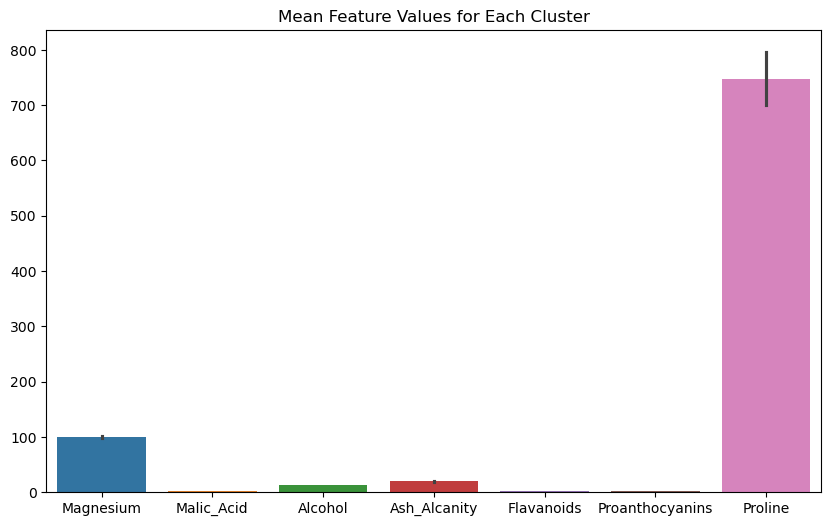

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(df[['Magnesium', 'Malic_Acid', 'Alcohol', 'Ash_Alcanity', 'Flavanoids', 'Proanthocyanins', 'Proline']])

plt.title('Mean Feature Values for Each Cluster')
plt.show()